In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import warnings
warnings.filterwarnings('ignore')

In [47]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Fire Detection

/content/drive/MyDrive/Fire Detection


In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_images/fire.110.png  
  inflating: fire_dataset/fire_images/fire.111.png  
  inflating: fire_dataset/fire_images/fire.112.png  
  inflating: fire_dataset/fire_images/fire.113.png  
  inflating: fire_dataset/fire_images/fire.114.png  
  inflating: fire_dataset/fire_

In [ ]:
len(os.listdir('/content/drive/MyDrive/Fire Detection/fire_dataset/fire_images'))

755

In [ ]:
len(os.listdir('/content/drive/MyDrive/Fire Detection/fire_dataset/non_fire_images'))

244

In [ ]:
import shutil
count = 1
for file in os.listdir('/content/drive/MyDrive/Fire Detection/fire_dataset/fire_images'):
  src_dir = "/content/drive/MyDrive/Fire Detection/fire_dataset/fire_images/"
  dst1_dir = "/content/drive/MyDrive/train/fire"
  dst2_dir = "/content/drive/MyDrive/test/fire"
  if count%15 == 0:
    shutil.move(f'{src_dir}{file}',dst2_dir)
  else:
    shutil.move(f'{src_dir}{file}',dst1_dir)
  count+=1

In [ ]:
len(os.listdir('/content/drive/MyDrive/train/fire'))

705

In [ ]:
len(os.listdir('/content/drive/MyDrive/test/fire'))

50

In [ ]:
count = 1
for file in os.listdir('/content/drive/MyDrive/Fire Detection/fire_dataset/non_fire_images'):
  src_dir = "/content/drive/MyDrive/Fire Detection/fire_dataset/non_fire_images/"
  dst1_dir = "/content/drive/MyDrive/train/non_fire"
  dst2_dir = "/content/drive/MyDrive/test/non_fire"
  if count%10 == 0:
    shutil.move(f'{src_dir}{file}',dst2_dir)
  else:
    shutil.move(f'{src_dir}{file}',dst1_dir)
  count+=1

In [ ]:
len(os.listdir('/content/drive/MyDrive/train/non_fire'))

220

In [ ]:
len(os.listdir('/content/drive/MyDrive/test/non_fire'))

24

In [5]:
train_path = '/content/drive/MyDrive/Fire Detection/fire_dataset/train'
test_path = '/content/drive/MyDrive/Fire Detection/fire_dataset/test'

In [6]:
os.listdir(train_path+'/fire/')
fire_image = train_path+'/fire/'+'fire.73.png'

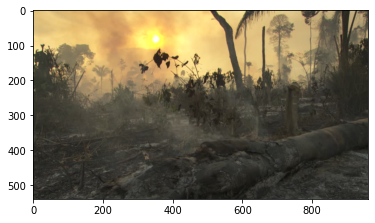

In [7]:
plt.imshow(imread(fire_image, 0))

In [8]:
os.listdir(train_path+'/non_fire/')
non_fire_image = train_path+'/non_fire/'+'non_fire.54.png'

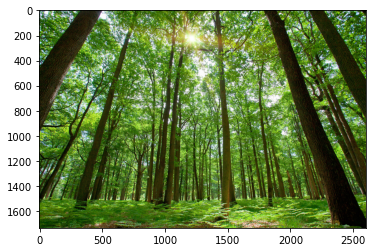

In [9]:
plt.imshow(imread(non_fire_image, 0))

In [10]:
imread(fire_image, 0).shape

(540, 960, 3)

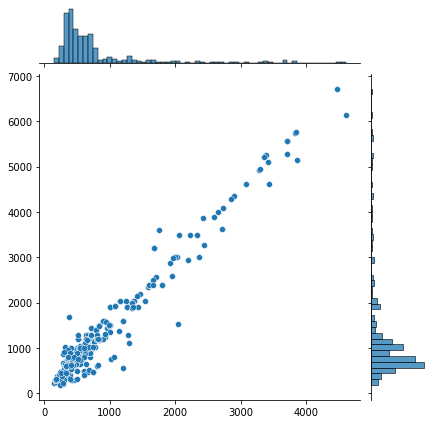

In [11]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(train_path + '/fire/'):
    img = imread(train_path + '/fire/' + image, 0)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

sns.jointplot(dim1, dim2)

In [ ]:
print(np.mean(dim1))
print(np.mean(dim2))

706.068085106383
1099.268085106383


In [12]:
image_shape = (500, 500, 3)

In [13]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, height_shift_range=0.3, zoom_range=0.3, horizontal_flip=True, vertical_flip=True, rescale=1/255, shear_range=0.2)
test_data_gen = ImageDataGenerator(rescale=1/255)

In [14]:
training_set = train_data_gen.flow_from_directory(train_path, image_shape[:2], class_mode='binary', batch_size=32)
test_set = test_data_gen.flow_from_directory(test_path, image_shape[:2], class_mode='binary', batch_size=32, shuffle=False)

Found 925 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [15]:
training_set.class_indices

{'fire': 0, 'non_fire': 1}

In [ ]:
next(training_set)[0].shape

(32, 700, 1000, 3)

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=image_shape,))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

In [19]:
model.fit(training_set, batch_size=32, epochs=30, validation_data=test_set, callbacks=[early_stop], validation_batch_size=32)

Epoch 1/30
29/29 [==============================] - 350s 12s/step - loss: 1.2658 - accuracy: 0.7676 - val_loss: 0.1921 - val_accuracy: 0.9324
Epoch 2/30
29/29 [==============================] - 77s 3s/step - loss: 0.3013 - accuracy: 0.8941 - val_loss: 0.1928 - val_accuracy: 0.9595
Epoch 3/30
29/29 [==============================] - 78s 3s/step - loss: 0.2436 - accuracy: 0.9146 - val_loss: 0.0712 - val_accuracy: 0.9730
Epoch 4/30
29/29 [==============================] - 78s 3s/step - loss: 0.1948 - accuracy: 0.9286 - val_loss: 0.1108 - val_accuracy: 0.9324
Epoch 5/30
29/29 [==============================] - 77s 3s/step - loss: 0.1863 - accuracy: 0.9459 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 6/30
29/29 [==============================] - 75s 3s/step - loss: 0.1448 - accuracy: 0.9557 - val_loss: 0.2227 - val_accuracy: 0.9054
Epoch 7/30
29/29 [==============================] - 76s 3s/step - loss: 0.2661 - accuracy: 0.8995 - val_loss: 0.1135 - val_accuracy: 0.9865
Epoch 8/30
29/29 [

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.265821,0.767568,0.192129,0.932432
1,0.301317,0.894054,0.192776,0.959459
2,0.243586,0.914595,0.071210,0.972973
3,0.194796,0.928649,0.110796,0.932432
4,0.186316,0.945946,0.094218,0.972973
5,0.144757,0.955676,0.222659,0.905405
6,0.266108,0.899459,0.113469,0.986486
7,0.149221,0.950270,0.090168,0.986486


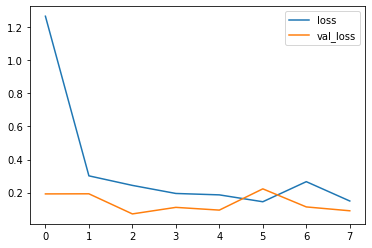

In [22]:
losses[['loss', 'val_loss']].plot()

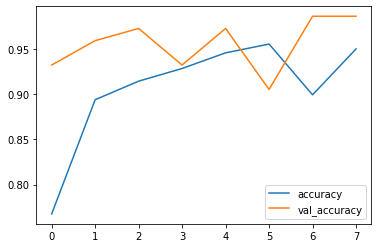

In [23]:
losses[['accuracy', 'val_accuracy']].plot()

In [24]:
model.evaluate(test_set)

3/3 [==============================] - 4s 756ms/step - loss: 0.0902 - accuracy: 0.9865


[0.09016845375299454, 0.9864864945411682]

In [27]:
model.save('classifier.h5')

In [28]:
pred = model.predict(test_set)

In [29]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
predictions = pred > 0.5

In [31]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.96      1.00      0.98        24

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.98        74
weighted avg       0.99      0.99      0.99        74



In [34]:
confusion_matrix(test_set.classes, predictions)

array([[49,  1],
       [ 0, 24]])

In [41]:
os.listdir(test_path+'/fire/')
fire_img = test_path+'/fire/'+'fire.72.png'

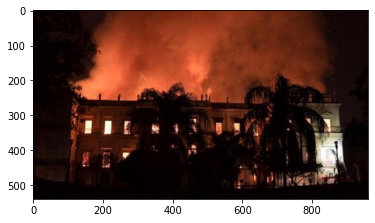

In [43]:
plt.imshow(imread(fire_img, 0))

In [60]:
test_image = imread(fire_img, 0)

In [61]:
test_image.shape

(540, 960, 3)

In [62]:
new_image = tensorflow.compat.v1.image.resize(
    test_image, (500, 500), method=tensorflow.image.ResizeMethod.BILINEAR, align_corners=False,
    preserve_aspect_ratio=False, name=None
)

In [63]:
new_image.shape

TensorShape([500, 500, 3])

In [66]:
new_image = np.expand_dims(new_image, axis=0)

In [67]:
new_image.shape

(1, 500, 500, 3)

In [70]:
new_image = new_image/255

In [73]:
if model.predict(new_image) > 0.5:
  print('no fire detected')
else:
  print('fire detected')

fire detected


In [72]:
test_set.class_indices

{'fire': 0, 'non_fire': 1}